In [18]:
import json, csv, os, shutil
from csv import writer, reader
from os import path

In [ ]:
dump = {}
with open('kym2imgflip.csv') as mappingfile:
    k2i = reader(mappingfile)
    for ki in k2i:
        temp_id = ki[1].replace('https://imgflip.com/meme/','').split('/')[0]
        if(path.exists('./databytemplate/'+temp_id)):           
            shutil.move('./databytemplate/'+temp_id, './databytemplate/mapped/'+temp_id, copy_function = shutil.copy2)

In [20]:
l = [[f] for f in os.listdir('../imgflip/databytemplate/') if '.' not in f]

In [21]:
l[0:10]

[['10013392'],
 ['10015989'],
 ['100214972'],
 ['10023810'],
 ['1002494'],
 ['100255588'],
 ['100295162'],
 ['10053191'],
 ['100538243'],
 ['1006090']]

In [ ]:
def save2csv(filename, header, data):
    with open(filename, 'w', newline='') as csvfile:
        csvw = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        csvw.writerow(header)
        for d in data:
            csvw.writerow(d)

In [ ]:
save2csv('imgfliptemplates2.csv',['imgflip'],l)

In [22]:
! ./resolve.sh > resolved.csv

^C


In [35]:
import requests
from bs4 import BeautifulSoup
from difflib import SequenceMatcher


SEARCH_SIMILARITY_THRESHOLD = .2

HEADERS = {'User-Agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 '
        '(KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')}


def search_meme(text):
    """Return a meme name and url from a meme keywords.
    """
    r = requests.get('http://knowyourmeme.com/search?q=%s' % text, headers=HEADERS)
    soup = BeautifulSoup(r.text, 'html.parser')
    memes_list = soup.find(class_='entry_list')
    if memes_list:
        meme_path = memes_list.find('a', href=True)['href']
        return meme_path.replace('-', ' '), 'https://knowyourmeme.com%s' % meme_path
    return None, None


def search(text):
    """Return a meme definition from a meme keywords.
    """
    meme_name, url = search_meme(text)
    if meme_name and SequenceMatcher(None, text, meme_name).ratio() >= SEARCH_SIMILARITY_THRESHOLD:
        r = requests.get(url, headers=HEADERS)
        soup = BeautifulSoup(r.text, 'html.parser')
        entry = soup.find('h2', {'id': 'about'})
        return '%s - %s' % (meme_name.split('/')[-1].title(), entry.next.next.next.text)

    
def url(text):
    """Return a meme definition from a meme keywords.
    """
    meme_name, url = search_meme(text)
    if meme_name and SequenceMatcher(None, text, meme_name).ratio() >= SEARCH_SIMILARITY_THRESHOLD:
        r = requests.get(url, headers=HEADERS)
        soup = BeautifulSoup(r.text, 'html.parser')
        entry = soup.find('h2', {'id': 'about'})
        return url

def name(text):
    """Return a meme definition from a meme keywords.
    """
    meme_name, url = search_meme(text)
    if meme_name and SequenceMatcher(None, text, meme_name).ratio() >= SEARCH_SIMILARITY_THRESHOLD:
        r = requests.get(url, headers=HEADERS)
        soup = BeautifulSoup(r.text, 'html.parser')
        entry = soup.find('h2', {'id': 'about'})
        return meme_name.split('/')[-1].title()

In [38]:
search('is this a pidgeon')

In [ ]:
def save2csv(filename, header, data):
    with open(filename, 'w', newline='') as csvfile:
        csvw = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        csvw.writerow(header)
        for d in data:
            csvw.writerow(d)

In [ ]:
from csv import writer, reader, QUOTE_MINIMAL

In [ ]:
with open('imgflip2kym.csv', 'w', newline='') as csvfile1:
    csvw = writer(csvfile1, delimiter=',',quotechar='|', quoting=QUOTE_MINIMAL)
    csvw.writerow(['imgflip', 'name', 'kym', 'name'])
    csvfile1.flush()
    with open('./imgflip_templates.csv') as csvfile:
        urls = reader(csvfile)
        for imgflip_meme in urls:
            l = url(imgflip_meme[1].replace('-',' '))
            if l:
                csvw.writerow(imgflip_meme+l)
                csvfile1.flush()

In [12]:
import pandas as pd

In [15]:
links = pd.read_csv('imgflip2kym.csv')

In [17]:
links

,imgflip_url,imgflip_name,kym_url
0,https://imgflip.com/meme/10-Guy,10-Guy,https://knowyourmeme.com/memes/10-guy
1,https://imgflip.com/meme/10013392/Happy-Squirrel,Happy-Squirrel,NaN
2,https://imgflip.com/meme/100214972/idiot-skull,idiot-skull,NaN
3,https://imgflip.com/meme/100255588/Are-we-the-...,Are-we-the-baddies,https://knowyourmeme.com/memes/are-we-the-baddies
4,https://imgflip.com/meme/100295162/Turn-up-the...,Turn-up-the-volume,https://knowyourmeme.com/memes/turn-up-the-volume
...,...,...,...
1797,https://imgflip.com/meme/Zombie-Bad-Luck-Brian,Zombie-Bad-Luck-Brian,NaN
1798,https://imgflip.com/meme/Zombie-Overly-Attache...,Zombie-Overly-Attached-Girlfriend,NaN
1799,https://imgflip.com/meme/Zorg,Zorg,NaN
1800,https://imgflip.com/meme/Zuckerberg,Zuckerberg,https://knowyourmeme.com/memes/people/mark-zuc...


In [16]:
non_nulls = links.dropna()

In [ ]:
ds1 = set(map(tuple, links.values))
ds2 = set(map(tuple, non_nulls.values))

In [ ]:
nulls = pd.DataFrame(list(ds1.difference(ds2)))

In [ ]:
nulls.apply(lambda x: print(x[1]), axis=1)

In [ ]:
with open('imgflip2kym.csv', 'rw', newline='') as csvfile1:
    csvw = writer(csvfile1, delimiter=',',quotechar='|', quoting=QUOTE_MINIMAL)
    csvw.writerow(['imgflip', 'name', 'kym', 'name'])
    csvfile1.flush()
    with open('./imgflip_templates.csv') as csvfile:
        urls = reader(csvfile)
        for imgflip_meme in urls:
            l = url(imgflip_meme[1].replace('-',' '))
            if l:
                csvw.writerow(imgflip_meme+l)
                csvfile1.flush()

In [21]:
kym = pd.read_csv('queryResults.csv', delimiter=';', names=["kym_url","kym_name"])

In [22]:
kym

,kym_url,kym_name
0,s,title
1,https://knowyourmeme.com/memes/normie,Normie
2,https://knowyourmeme.com/memes/budd-dwyer-suic...,Budd Dwyer Suicide Video
3,https://knowyourmeme.com/memes/boop,Boop
4,https://knowyourmeme.com/memes/impossible-is-n...,Impossible is Nothing
...,...,...
1400,https://knowyourmeme.com/memes/barack-obama-is...,Barack Obama Is Your New Bicycle
1401,https://knowyourmeme.com/memes/oh-long-johnson,Oh Long Johnson
1402,https://knowyourmeme.com/memes/whoosh-%D0%B2%D...,Whoosh / вжух
1403,https://knowyourmeme.com/memes/necroposting,Necroposting


In [54]:
imgflip_url = pd.read_csv('imgflip_templates.csv', names=["imgflip_url","imgflip_name"])

In [55]:
imgflip_codes = pd.read_csv('resolved2.csv', names=["imgflip_url","imgflip_code"])

In [59]:
imgflip = imgflip_url.set_index('imgflip_url').join(imgflip_codes.set_index('imgflip_url'), on='imgflip_url').reset_index()

In [99]:
tofind = ["1990s-First-World-Problems","A-winner-is-you","Alice-in-Wonderland-Face-Palm-Facepalm","All-your-base","all-your-base-are-belong-to-us","ALL-YOUR-BASE-ARE-BELONG-TO-US","All-your-base-are-belong-to-us","All-Your-Bases-Are-Belong-To-Us","Angry-German-Kid","Angry-German-kid","Angry-German-Kid-Scream","ANIME-BUTTERFLY-MEME","Arson-Girl","Ash-Ketchum-Facepalm","Aurora-Borealis-Steamed-Hams","Bad-Luck-Brian","Bad-Luck-Brian-Cry","Bad-Luck-Brian-Headless","Bad-Luck-Brian-Nerdy","Bad-Luck-Brian-Radioactive","Badger-badger-badger","Be-Like-Bill","Beat-up-Bad-Luck-Brian","Bernie-Or-Hillary","Bernie-or-Hillary","Bernie-or-Hillary-on-the-Issues","Bitch-Please","black-bad-Luck-Brian","Blank-Starter-Pack","burger-king","Bush-did-911","Calculating-meme","Captain-Obvious","captain-obvious","Captain-obvious","Captain-Obvious-2","Captain-Obvious-Bathing-Suit","Captain-Obvious-large","Captain-Picard-Facepalm","CATURDAY","Caturday-Cats-helping-with-coffee","Caturday-Dreamin","Caveman-spongebob","Christmas-FHRITP","Chuck-norris-fact","Citation-Needed","Computer-Guy-And-Table-Flip-Guy","Computer-Guy-Facepalm","Computertable-flip-guy","Confession-Kid","CONFUSED-MATH-LADY","Confused-Math-Lady","crying-black-guy","Crying-Jordan","Crying-Lady","crying-michael-jordan","Crying-Michael-Jordan","Crying-Michael-Jordan--Computer","Crying-MJ","Dat-boi","dat-boi","Dat-Boi","David-After-Dentist---Is-This-Real-Life","Disaster-Girl","disaster-girl-anime-megumin-konosuba-explotion","disaster-girl-car","Disaster-Girl-Explosion","Disaster-Girl-GIF","Distracted-boyfriend","Distracted-Boyfriend","distracted-boyfriend-anime-re-zero","Distracted-Boyfriend-Matrix-Edition","Do-a-Barrel-Roll","Do-a-barrel-roll","Do-A-Barrel-Roll","Doge","Doge-2","Dont-talk-to-me-or-my-son-ever-again","dont-talk-to-me-or-my-son-ever-again","Dont-Talk-To-Me-Or-My-Son-Ever-Again","Dont-talk-to-me-or-my-son-ever-again-birds","Doris-look-of-disapproval","Double-Facepalm","Dramatic-Chipmunk","dramatic-chipmunk","Duck-Face","Duck-Face-Chicks","EBOLA-CHAN","Evil-Girl-Fire","Facepalm","Facepalm-Bear","fhritp","First-World-Problems","First-World-Problems-Cat","First-World-Problems-Izzy","Flip-Table","florida-man","Forever-Alone","forever-alone","Forever-Alone-Christmas","gave-me-cancer","girl-fire-house","Girl-house-on-fire","Glorious-PC-Gaming-Master-Race","Goatse","God-Hands-Goatse","Godwins-Law-Chart","Good-Guy-Greg","Good-Guy-Greg-No-Joint","Grammar-Nazi","Grammar-Nazi-Cat","Grammar-Nazi-Teacher","grimdark-chrisy","Grumpy-cat","Grumpy-Cat","grumpy-cat-again","Grumpy-Cat-Bed","Grumpy-Cat-Birthday","Grumpy-Cat-Reverse","Grumpy-Cat-Star-Wars","Grumpy-Cat-Table","hello-darkness","hello-darkness-my-old-friend","Hitler-Downfall","hitler-taking-off-glasses","Hmm-Captain-Obvious","Horse-head-mask","Horse-head-mask-and-now-we-wait","I-am-Error","I-Am-Error","I-am-error","Ice-Bucket-Challenge","Is-this-a-bird","Is-This-A-blank","Is-This-a-Pigeon","Is-This-A-Pigeon","Its-Caturday","its-dangerous-to-go-alone-take-this","Its-dangerous-to-go-alone-Take-this-","Its-OVER-9000","Its-over-9000-Dragon-Ball-Z-Newer-Animation","jesus-facepalm","Karen","Kekistan","kewlew-as-captain-obvious","Keyboard-cat","King-Harkinian","Kitler","Kyon-Facepalm-Ver-2","le-happy-merchant","lolcat","Longcat","Math-ladyConfused-lady","meme-man","Michael-Jordan","Michael-Jordan-Crying","Morshu-fast","My-eyes-are-up-here","New-Michael-Jordan-crying-meme","NPC","Nuclear-Gandhi","Numa-Numa-Guy","Nyan-Cat","O-RLY","Obama-Facepalm-250px","oh-long-Johnson","ola-k-ase","omae-wa-mou-shindeiru","OMG-Karen","Overly-Attached-Girlfriend","pedobear","Pepe-the-Frog","Picard-Riker-Worf-Triple-Facepalm","Polandball","Pope-Francis-Facepalm","Putin-Facepalm","Really-Distracted-Boyfriend","Resting-Bitch-Face","Roblox-Death-Sound","Sad-cat","Sad-micheal-jordan","Sad-Spiderman","sans-lenny-face","Scumbag-Steve","serbia-strong","Shrek-is-love-shrek-is-life","Sniffles-Facepalm-HTF","Spiderman-Hospital","Spongegar","Star-on-December-21st","Stoned-Fox","Success-Kid-Original","Table-Flip-Guy","Ted-Cruz-Zodiac-Killer","Thanks-captain-obvious","Thanks-Obama","That-Post-gave-me-Cancer","The-Ban-Hammer","The-cake-is-a-lie","the-comments-gave-me-cancer","The-most-interesting-man-in-the-world-facepalm","The-ugly-barnacle","Trollface","Udo----","unlucky-ginger-kid","Virgin-vs-chad","Virgin-vs-Chad","Waluigi","We-are-number-one","Why-is-this-happening-to-me-david-after-dentist","Will-it-blend","wololo","wow-doge","You-Are-An-Idiot","Zombie-Bad-Luck-Brian","Zombie-Overly-Attached-Girlfriend"]

In [123]:
name = 'Be-Like-Bill'

In [124]:
imgflip[imgflip['imgflip_name']==name].index.notnull()

array([ True])

In [135]:
tofind = ['Facepalm']

In [137]:
# imgflip[imgflip['imgflip_name'].isin(tofind)]['imgflip_code'].apply(lambda x : x.replace('https://imgflip.com/meme/','')).to_csv('codes.pandas.csv')

In [147]:
imgflip[imgflip['imgflip_name'].apply(lambda x: compareOrContains(x, 'Facepalm') > 0.7)]

,imgflip_url,imgflip_name,imgflip_code
411,https://imgflip.com/meme/Captain-Picard-Facepalm,Captain-Picard-Facepalm,https://imgflip.com/meme/1509839
413,https://imgflip.com/meme/Facepalm-Bear,Facepalm-Bear,https://imgflip.com/meme/1511235
1480,https://imgflip.com/meme/Computer-Guy-Facepalm,Computer-Guy-Facepalm,https://imgflip.com/meme/577482


In [136]:
for name in tofind:
    if  aindex:
        index = imgflip[imgflip['imgflip_name']==name]['imgflip_code'].index[0]
        print(imgflip[imgflip['imgflip_name']==name]['imgflip_name'][index] + '/' + imgflip[imgflip['imgflip_name']==name]['imgflip_code'][index].replace('https://imgflip.com/meme/',''))

ValueError: The truth value of a Int64Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
imgflip['imgflip_name']=imgflip.apply(lambda x: x[1].replace('-',' '), axis=1)

,imgflip_url,imgflip_name
0,https://imgflip.com/meme/10013392/Happy-Squirrel,Happy Squirrel
1,https://imgflip.com/meme/Chill-Out-Lemur,Chill Out Lemur
2,https://imgflip.com/meme/100214972/idiot-skull,idiot skull
3,https://imgflip.com/meme/Obama-No-Listen,Obama No Listen
4,https://imgflip.com/meme/Gaga-Baby,Gaga Baby
...,...,...
1796,https://imgflip.com/meme/Okay-Guy-Rage-Face2,Okay Guy Rage Face2
1797,https://imgflip.com/meme/99465667/Old-man-cup-...,Old man cup of coffee
1798,https://imgflip.com/meme/Cool-Cat-Stroll,Cool Cat Stroll
1799,https://imgflip.com/meme/9965006/Titanic-Sinking,Titanic Sinking


In [58]:
prod = imgflip.merge(kym, how='cross')

In [64]:
prod2 = kym.merge(imgflip, how='cross')

In [144]:
def compare(x,y):
    from difflib import SequenceMatcher
    return SequenceMatcher(None, x.replace('-',''), y.replace('-','')).ratio() 

In [142]:
def compareOrContains(x,y):
    if y in x or x in y:
        return 1 + compare(x,y)
    else :
        return compare(x,y)

In [60]:
prod['threashold'] = prod.apply(lambda x: compare(str(x[1]),str(x[3])), axis=1)

In [88]:
prod.loc[prod['threashold']> 0.6]

,imgflip_url,imgflip_name,kym_url,kym_name,threashold
229,https://imgflip.com/meme/10013392/Happy-Squirrel,Happy Squirrel,https://knowyourmeme.com/memes/crasher-squirrel,Crasher Squirrel,0.666667
427,https://imgflip.com/meme/10013392/Happy-Squirrel,Happy Squirrel,https://knowyourmeme.com/memes/happy-kitten,Happy Kitten,0.615385
5086,https://imgflip.com/meme/Obama-No-Listen,Obama No Listen,https://knowyourmeme.com/memes/obama-hope-posters,ObamaHope Posters,0.625000
5698,https://imgflip.com/meme/Gaga-Baby,Gaga Baby,https://knowyourmeme.com/memes/laughing-baby,Laughing Baby,0.636364
5707,https://imgflip.com/meme/Gaga-Baby,Gaga Baby,https://knowyourmeme.com/memes/dancing-baby,Dancing Baby,0.666667
...,...,...,...,...,...
2517139,https://imgflip.com/meme/Disaster-Girl,Disaster Girl,https://knowyourmeme.com/memes/dumpster-fire,Dumpster Fire,0.615385
2517633,https://imgflip.com/meme/Disaster-Girl,Disaster Girl,https://knowyourmeme.com/memes/disaster-girl,Disaster Girl,1.000000
2518526,https://imgflip.com/meme/House-Bunny,House Bunny,https://knowyourmeme.com/memes/honey-bun-baby,Honey Bun Baby,0.640000
2524482,https://imgflip.com/meme/Okay-Guy-Rage-Face2,Okay Guy Rage Face2,https://knowyourmeme.com/memes/no-rage-face,NO. Rage Face,0.687500


In [66]:
prod2['threashold'] = prod2.apply(lambda x: compare(str(x[1]),str(x[3])), axis=1)

In [71]:
prod = prod.drop([0, 1,3,4])

In [78]:
prod = prod[prod.kym_url != 's']

In [149]:
df = prod.loc[prod['threashold']>= 0.3].sort_values('threashold', ascending=False)

In [150]:
(
    df
    .groupby(level=0)
    .apply(lambda group: group.loc[group['imgflip_url'] == group['threashold'].max()])
    .reset_index(level=-1, drop=True)
)

,imgflip_url,imgflip_name,kym_url,kym_name,threashold


In [105]:
df1 = prod.sort_values('threashold', ascending=False).drop_duplicates(['kym_url'])

In [106]:
len(df1)

1404

In [110]:
dd = df1.loc[df1['threashold']> .6]

In [124]:
dd.duplicated(['imgflip_url'])

1774645    False
2215947    False
2163374    False
194704     False
575228     False
           ...  
2013031    False
1960109    False
1985822    False
769251     False
1673644    False
Length: 351, dtype: bool

In [129]:
dd[dd['imgflip_url'].isin(dd['imgflip_url'][dd['imgflip_url'].duplicated()])].sort_values('threashold', ascending=False)

,imgflip_url,imgflip_name,kym_url,kym_name,threashold
1774645,https://imgflip.com/meme/Duck-Face,Duck Face,https://knowyourmeme.com/memes/duck-face,Duck Face,1.000000
2381360,https://imgflip.com/meme/Derpina,Derpina,https://knowyourmeme.com/memes/derpina,Derpina,1.000000
2139570,https://imgflip.com/meme/Advice-Dog,Advice Dog,https://knowyourmeme.com/memes/advice-dog,Advice Dog,1.000000
2173542,https://imgflip.com/meme/Depression-Dog,Depression Dog,https://knowyourmeme.com/memes/depression-dog,Depression Dog,1.000000
2204475,https://imgflip.com/meme/College-Freshman,College Freshman,https://knowyourmeme.com/memes/college-freshman,College Freshman,1.000000
...,...,...,...,...,...
67192,https://imgflip.com/meme/Captain-Hindsight,Captain Hindsight,https://knowyourmeme.com/memes/cats-wearing-ti...,Cats Wearing Tights,0.611111
2356241,https://imgflip.com/meme/Mario-Hammer-Smash,Mario Hammer Smash,https://knowyourmeme.com/memes/mario-fundamentals,Mario FUNdamentals,0.611111
169799,https://imgflip.com/meme/Hoody-Cat,Hoody Cat,https://knowyourmeme.com/memes/snoopy-the-cat,Snoopy the Cat,0.608696
517616,https://imgflip.com/meme/144961820/Trojan-Horse,Trojan Horse,https://knowyourmeme.com/memes/noend-house,NoEnd House,0.608696


In [176]:
imgflip['Grumpy Cat'] =imgflip.apply(lambda x: compareOrContains('Grumpy Cat', x[1]), axis=1)

In [177]:
imgflip.sort_values(['Grumpy Cat'], ascending=False)

,imgflip_url,imgflip_name,Grumpy Cat
1347,https://imgflip.com/meme/Grumpy-Cat,Grumpy Cat,2.000000
1326,https://imgflip.com/meme/Grumpy-Cat-Bed,Grumpy Cat Bed,1.833333
1339,https://imgflip.com/meme/Grumpy-Cat-Sky,Grumpy Cat Sky,1.833333
1433,https://imgflip.com/meme/Grumpy-Cat-Happy,Grumpy Cat Happy,1.769231
1430,https://imgflip.com/meme/Grumpy-Cat-Table,Grumpy Cat Table,1.769231
...,...,...,...
973,https://imgflip.com/meme/244819408/Adios,Adios,0.000000
114,https://imgflip.com/meme/10821519/Love,Love,0.000000
1697,https://imgflip.com/meme/Doge,Doge,0.000000
946,https://imgflip.com/meme/237388506/Bonk,Bonk,0.000000


In [216]:
imgflip

,imgflip_url,imgflip_name
0,https://imgflip.com/meme/10013392/Happy-Squirrel,Happy Squirrel
1,https://imgflip.com/meme/Chill-Out-Lemur,Chill Out Lemur
2,https://imgflip.com/meme/100214972/idiot-skull,idiot skull
3,https://imgflip.com/meme/Obama-No-Listen,Obama No Listen
4,https://imgflip.com/meme/Gaga-Baby,Gaga Baby
...,...,...
1796,https://imgflip.com/meme/Okay-Guy-Rage-Face2,Okay Guy Rage Face2
1797,https://imgflip.com/meme/99465667/Old-man-cup-...,Old man cup of coffee
1798,https://imgflip.com/meme/Cool-Cat-Stroll,Cool Cat Stroll
1799,https://imgflip.com/meme/9965006/Titanic-Sinking,Titanic Sinking


In [227]:
imgflip = pd.read_csv('imgflip_templates.csv', names=["imgflip_url","imgflip_name"])

In [229]:
with open('./queryResults.csv') as csvfile: #kym memes urls and titles
        urls = reader(csvfile, delimiter=';')
        for kym_memes in urls:
            imgflip[kym_memes[1]] = imgflip.apply(lambda x: compareOrContains(kym_memes[1], x[1]), axis=1)

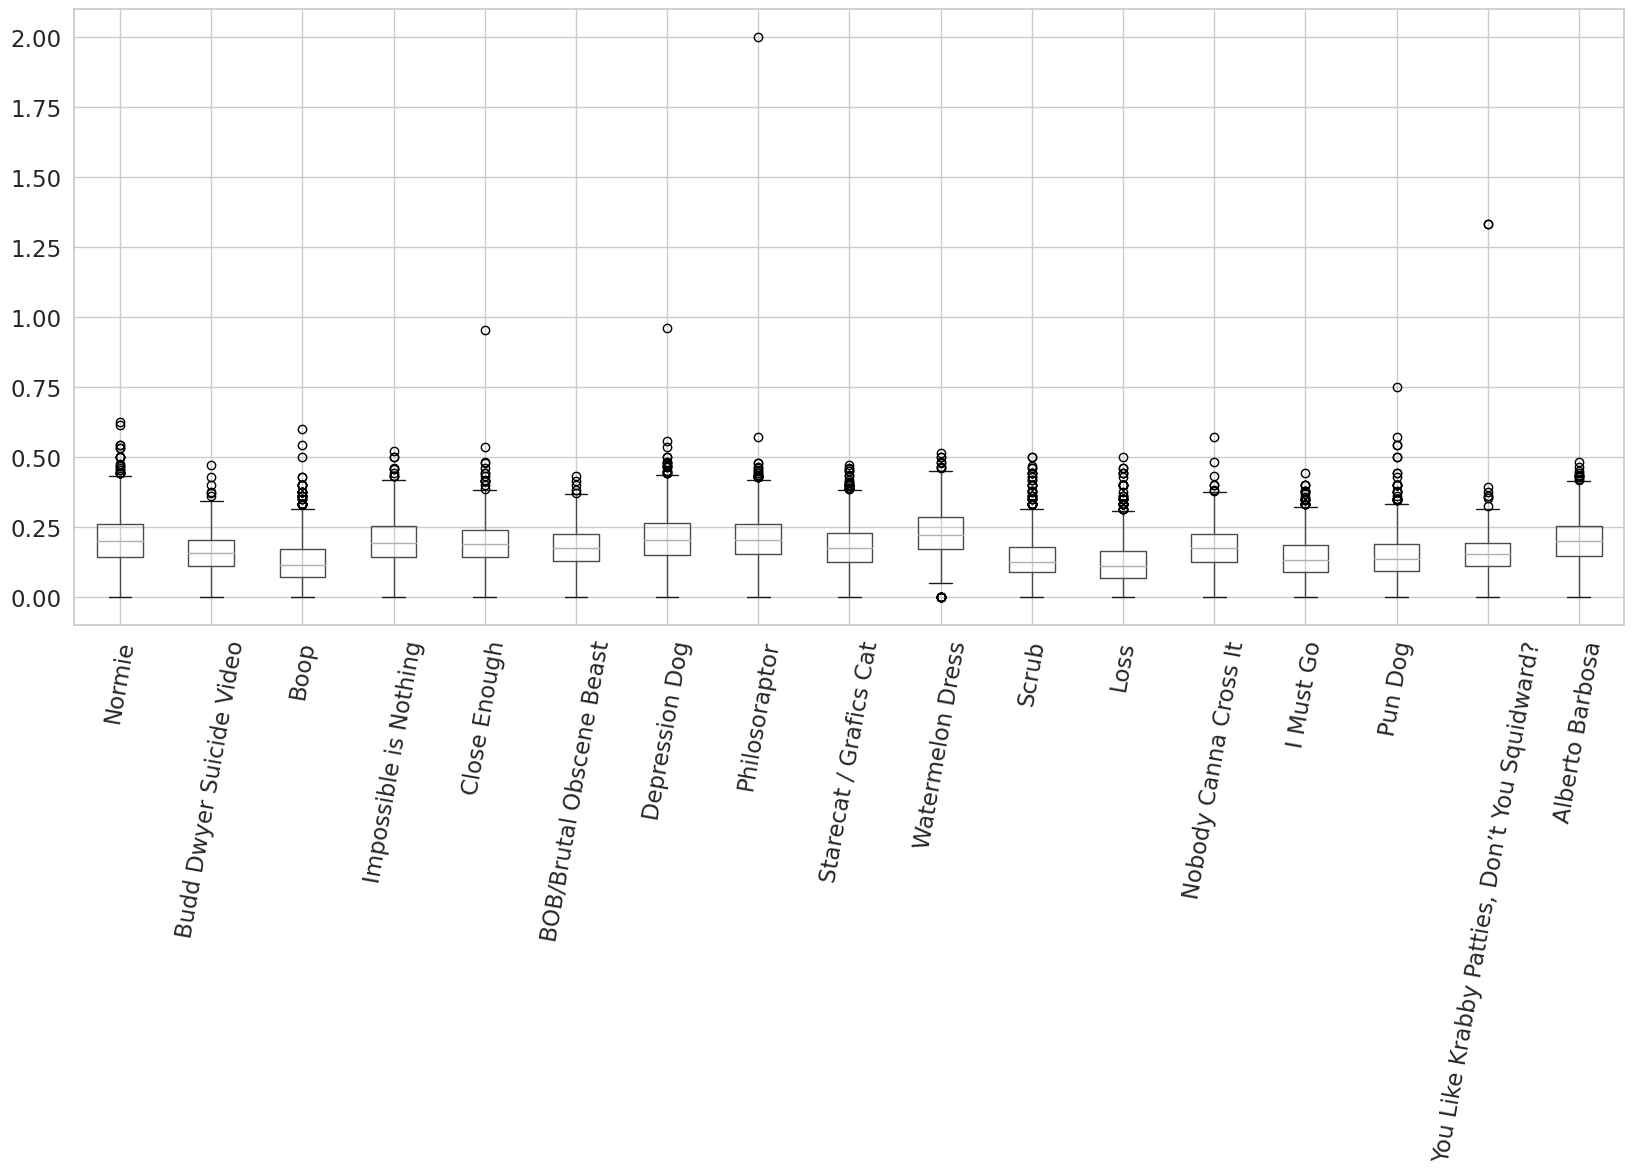

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(20,8)}, font_scale=1.5, style='whitegrid')
box = imgflip[list(imgflip.columns)[3:20]].boxplot()
box.set_xticklabels(list(imgflip.columns)[3:20], rotation=80)
plt.show()

In [4]:
! java -jar mapper.jar -m ./kym2imgflip.v1.rml.ttl -o ./linkage.nt

In [6]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.3/500.3 kB 175.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 465.1 kB/s eta 0:00:00a 0:00:01


In [8]:
from rdflib import Graph as RDFGraph

In [10]:
rg = RDFGraph()
rg.parse('./linkage.nt', format='nt')

<Graph identifier=Nfeb8392704954281a5be9184199f29d3 (<class 'rdflib.graph.Graph'>)>